<a href="https://www.kaggle.com/code/venkateshblks/bangalore-house-price-prediction?scriptVersionId=191786864" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bangluru-house-dataset/cleaned_data.csv
/kaggle/input/bangluru-house-dataset/bengaluru_house_prices.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df1=pd.read_csv('/kaggle/input/bangluru-house-dataset/cleaned_data.csv')
df1

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2
...,...,...,...,...,...
11557,Bellandur,1262.0,2.0,47.00,2
11558,Green Glen Layout,1715.0,3.0,112.00,3
11559,Whitefield,3453.0,4.0,231.00,5
11560,other,3600.0,5.0,400.00,4


In [5]:
df=pd.read_csv('/kaggle/input/bangluru-house-dataset/bengaluru_house_prices.csv')
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


## EDA

In [6]:
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [7]:
df.availability.value_counts()

availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64

In [8]:
df1.isna().sum()

location      0
total_sqft    0
bath          0
price         0
BHK           0
dtype: int64

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11562 entries, 0 to 11561
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    11562 non-null  object 
 1   total_sqft  11562 non-null  float64
 2   bath        11562 non-null  float64
 3   price       11562 non-null  float64
 4   BHK         11562 non-null  int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 451.8+ KB


In [10]:
pd.DataFrame(df1.location.value_counts()).head(10)

,count
location,
other,2414
Whitefield,462
Sarjapur Road,342
Electronic City,270
Thanisandra,221
Kanakpura Road,221
Yelahanka,201
Marathahalli,155
Raja Rajeshwari Nagar,148


In [11]:
df1.describe()

,total_sqft,bath,price,BHK
count,11562.000000,11562.000000,11562.000000,11562.000000
mean,1420.982350,2.578274,93.404798,2.707577
std,580.907282,1.078915,69.033459,1.062705
min,1.000000,1.000000,8.000000,1.000000
25%,1093.000000,2.000000,50.000000,2.000000
50%,1260.500000,2.000000,70.000000,3.000000
75%,1625.000000,3.000000,110.000000,3.000000
max,3800.000000,8.000000,430.000000,8.000000


In [12]:
df1.location.value_counts()

location
other                        2414
Whitefield                    462
Sarjapur  Road                342
Electronic City               270
Thanisandra                   221
                             ... 
2nd Phase Judicial Layout       8
HAL 2nd Stage                   7
Parappana Agrahara              6
Badavala Nagar                  5
Cunningham Road                 1
Name: count, Length: 241, dtype: int64

## Data Visualization

<Axes: xlabel='area_type', ylabel='price'>

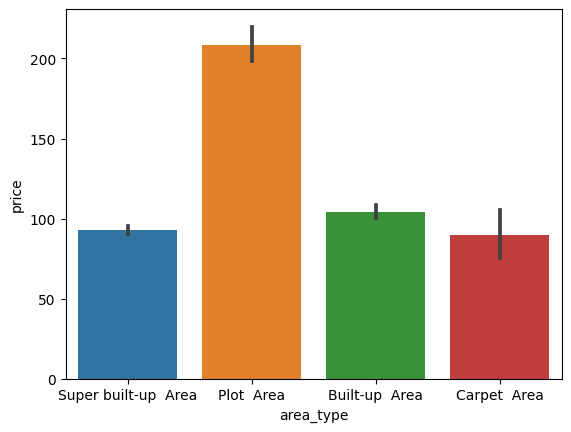

In [13]:
sns.barplot(x='area_type', y='price', data=df)

<Axes: xlabel='total_sqft', ylabel='price'>

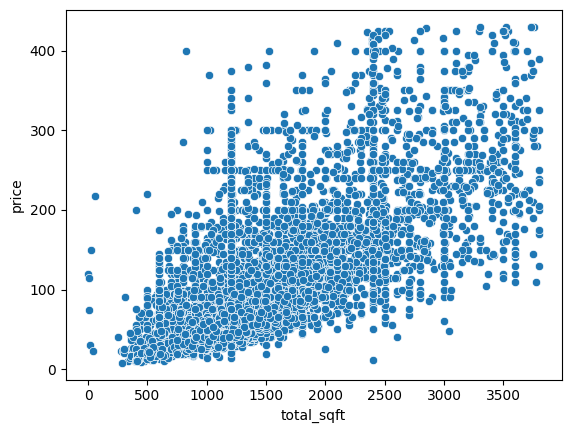

In [14]:
sns.scatterplot(x='total_sqft', y='price', data=df1)

**price is slightly dependent on size**

<Axes: xlabel='balcony', ylabel='price'>

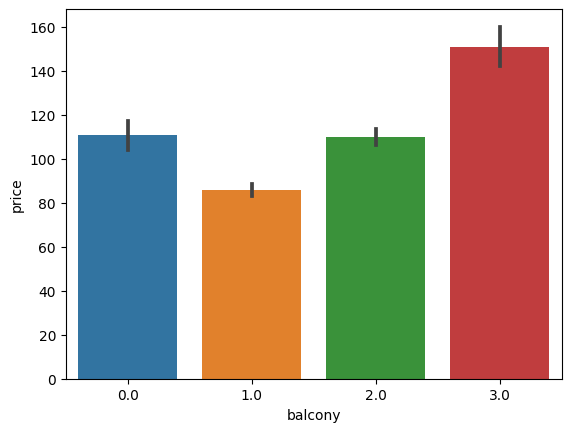

In [15]:
sns.barplot(x='balcony', y='price', data=df)

<Axes: xlabel='bath', ylabel='price'>

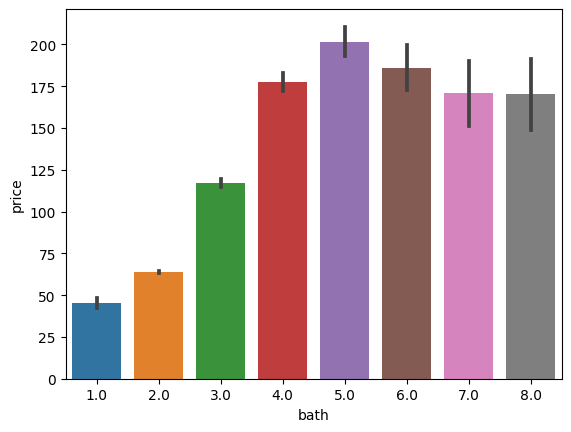

In [16]:
sns.barplot(x='bath', y='price', data=df1)

<Axes: xlabel='BHK', ylabel='price'>

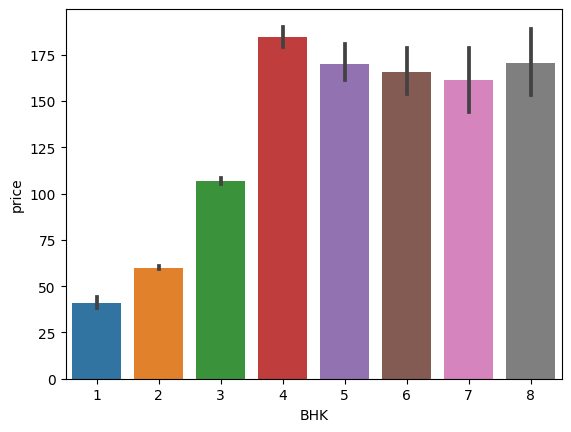

In [17]:
sns.barplot(x='BHK', y='price', data=df1)

<Axes: >

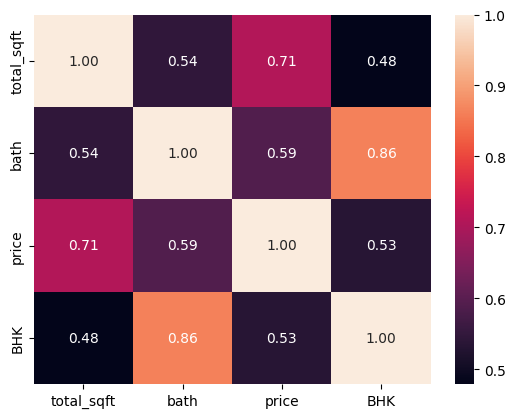

In [18]:
sns.heatmap(df1.drop('location',axis=1).corr(), annot=True, fmt=".2f",)

## Feature Encoding 

In [19]:
from sklearn.preprocessing import LabelEncoder
df2=df1.copy()
label_encoder = LabelEncoder()
df2['location'] = label_encoder.fit_transform(df1['location'])

In [20]:
df2.head(2)

,location,total_sqft,bath,price,BHK
0,79,1056.0,2.0,39.07,2
1,61,2600.0,5.0,120.00,4


## Model Building

In [21]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor,ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_log_error
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
    

In [22]:
X = df2.drop('price',axis = 1)
y = df2.price
X.head()

,location,total_sqft,bath,BHK
0,79,1056.0,2.0,2
1,61,2600.0,5.0,4
2,225,1440.0,2.0,3
3,159,1521.0,3.0,3
4,151,1200.0,2.0,2


In [23]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [24]:
X_train.shape

(8093, 4)

In [25]:
X_test.shape

(3469, 4)

In [26]:
def evaluate_model(model, X, y, model_name):
    y_pred = model.predict(X)
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, y_pred)
    mape = np.mean(np.abs((y - y_pred) / y)) * 100

    results = {
        'Model': model_name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R-squared': r2,
        'MAPE': mape
    }
    results_df = pd.DataFrame([results])
    return results_df


In [27]:
all_metrics_df = pd.DataFrame()

# List of models and their names
models = [
    ("Linear Regression", LinearRegression()),
    ("Ridge Regression", Ridge()),
    ("Lasso Regression", Lasso()),
    ("Decision Tree", DecisionTreeRegressor()),
    ("Random Forest", RandomForestRegressor()),
    ("Gradient Boosting", GradientBoostingRegressor()),
    ("AdaBoost", AdaBoostRegressor()),
    ("XGBoost", XGBRegressor()),
    ('extra trees', ExtraTreesRegressor()),
    ('mlp', MLPRegressor()),
    ('svr',SVR()),

]

for name, model in models:
    model.fit(X_train, y_train)
    metrics_df = evaluate_model(model, X_test, y_test, name)
    all_metrics_df = pd.concat([all_metrics_df, metrics_df], ignore_index=True)
all_metrics_df

,Model,MAE,MSE,RMSE,R-squared,MAPE
0,Linear Regression,29.784510,2063.946749,45.430681,0.553523,36.569373
1,Ridge Regression,29.784563,2063.954636,45.430768,0.553521,36.569434
2,Lasso Regression,29.787930,2067.190036,45.466362,0.552822,36.492583
3,Decision Tree,29.722431,2653.952161,51.516523,0.425892,33.781225
4,Random Forest,25.082298,1719.322415,41.464713,0.628073,29.335457
5,Gradient Boosting,25.373231,1608.166743,40.101954,0.652118,30.232770
6,AdaBoost,34.153583,2243.233512,47.362786,0.514739,48.473551
7,XGBoost,23.350199,1498.034236,38.704447,0.675942,27.215114
8,extra trees,26.758144,2038.242034,45.146894,0.559084,31.434608
9,mlp,30.165776,2134.083262,46.196139,0.538351,37.877013


In [28]:
param_grid_xgb = {
    'regressor_xgb__n_estimators': [200, 300, 400],  
    'regressor_xgb__max_depth': [3, 5, 7],  
    'regressor_xgb__learning_rate': [0.01, 0.1]
}
pipeline_xgb = Pipeline([('regressor_xgb', XGBRegressor())])
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
search_xgb = GridSearchCV(pipeline_xgb, param_grid_xgb, cv=kfold, scoring='r2', n_jobs=-1, verbose=4)
search_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('regressor_xgb',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     device=None,
                                                     early_stopping_rounds=None,
                                                     enable_categorical=False,
                                                     eval_metric=None,
                                                     feature_types=None,
                                                     gamma=None,
                                                     grow_poli...
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'regressor_xgb__learning_rate': [0.01, 0.1],
                         'regressor_xgb__max_depth': [3, 5, 7],
                         'regressor_xgb__n_estimators': [200, 300, 400]},
             scoring='r2', verbose=4)

In [29]:
search_xgb.best_params_

{'regressor_xgb__learning_rate': 0.1,
 'regressor_xgb__max_depth': 5,
 'regressor_xgb__n_estimators': 300}

In [30]:
search_xgb.best_score_

0.6858631418463274

In [31]:
model =XGBRegressor(learning_rate=0.1, max_depth=5, n_estimators=400)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=400, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [32]:
y_pred=model.predict(X_test)
y_pred

array([ 42.8909  ,  49.948456,  94.26867 , ..., 106.445656,  71.175705,
        71.39352 ], dtype=float32)

In [33]:
print(r2_score(y_test, y_pred))

0.6900488653328196


In [34]:
from pickle import load,dump
with open('house_price_model.pkl', 'wb') as file:
    dump(model, file)


In [35]:
# Save the label encoder
with open('label_encoder.pkl', 'wb') as file:
    dump(label_encoder, file)

In [36]:

import tensorflow as tf
import tensorflow_decision_forests as tfdf

2024-08-09 12:45:11.615931: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-09 12:45:11.616057: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-09 12:45:11.803390: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [37]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11562 entries, 0 to 11561
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    11562 non-null  object 
 1   total_sqft  11562 non-null  float64
 2   bath        11562 non-null  float64
 3   price       11562 non-null  float64
 4   BHK         11562 non-null  int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 451.8+ KB


In [38]:
df1.head(3)

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3


In [39]:
def split_dataset(df1, test_ratio=0.30):
  test_indices = np.random.rand(len(df1)) < test_ratio
  return df1[~test_indices], df1[test_indices]

train_ds_pd, valid_ds_pd = split_dataset(df1)
print("{} examples in training, {} examples in testing.".format(
    len(train_ds_pd), len(valid_ds_pd)))

8019 examples in training, 3543 examples in testing.


In [40]:
label='price'
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label ,task = tfdf.keras.Task.REGRESSION)
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)

In [41]:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

In [42]:
rf = tfdf.keras.RandomForestModel(hyperparameter_template="benchmark_rank1",\
                                  task = tfdf.keras.Task.REGRESSION)
rf.compile(metrics=["mse"])

Resolve hyper-parameter template "benchmark_rank1" to "benchmark_rank1@v1" -> {'winner_take_all': True, 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}.
Use /tmp/tmpqz6gq1y8 as temporary training directory


In [43]:
rf.fit(x=train_ds)

Reading training dataset...
Training dataset read in 0:00:07.263277. Found 8019 examples.
Training model...


[INFO 24-08-09 12:46:14.7671 UTC kernel.cc:1233] Loading model from path /tmp/tmpqz6gq1y8/model/ with prefix d408818cadef4f6f
[INFO 24-08-09 12:46:17.7054 UTC decision_forest.cc:660] Model loaded with 300 root(s), 586784 node(s), and 4 input feature(s).
[INFO 24-08-09 12:46:17.7054 UTC abstract_model.cc:1344] Engine "RandomForestGeneric" built
[INFO 24-08-09 12:46:17.7054 UTC kernel.cc:1061] Use fast generic engine


Model trained in 0:00:45.415489
Compiling model...
Model compiled.


In [44]:
evaluation = rf.evaluate(x=valid_ds,return_dict=True)

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

4/4 [==============================] - 8s 170ms/step - loss: 0.0000e+00 - mse: 1538.8058
loss: 0.0000
mse: 1538.8058


In [45]:

inspector = rf.make_inspector()
inspector.evaluation()

Evaluation(num_examples=8019, accuracy=None, loss=None, rmse=37.67735725432466, ndcg=None, aucs=None, auuc=None, qini=None)

In [46]:
inspector.variable_importances()["NUM_AS_ROOT"]

[("BHK" (1; #0), 196.0), ("bath" (1; #2), 62.0), ("total_sqft" (1; #4), 42.0)]

In [47]:
preds = rf.predict(valid_ds)
preds

4/4 [==============================] - 1s 168ms/step


array([[ 40.0183  ],
       [148.14229 ],
       [ 61.106438],
       ...,
       [ 77.64367 ],
       [ 50.451824],
       [240.465   ]], dtype=float32)

In [48]:
preds.squeeze()

array([ 40.0183  , 148.14229 ,  61.106438, ...,  77.64367 ,  50.451824,
       240.465   ], dtype=float32)

In [49]:
r2_score(valid_ds_pd.price, preds)

0.6790534402759902

In [50]:
mean_absolute_error(valid_ds_pd.price,preds)

23.44758023708041